In [1]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score as r2
from sklearn.cross_validation import train_test_split as ttsplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [12]:
# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print( "Boston housing dataset has {} data points and {} features.".format(*data.shape))

Boston housing dataset has 489 data points and 4 features


In [25]:
# Sample preview
print("Data ->\n",data.head(),"\n") 
print("Features(X) ->\n",features.head(),"\n") 
print("Prices(y) ->\n",prices.head(),"\n") 

Data ->
       RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0 

Features(X) ->
       RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7 

Prices(y) ->
 0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64 



In [14]:
# Checking the basic statistics 
minimum_price = min(prices)
maximum_price = max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print ("Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [15]:
# Building the performance metric for this model to be R2_score
def performance_metric(y_true, y_predict):
    return r2(y_true, y_predict)

In [16]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = ttsplit(features, prices, test_size=0.20, random_state=1)

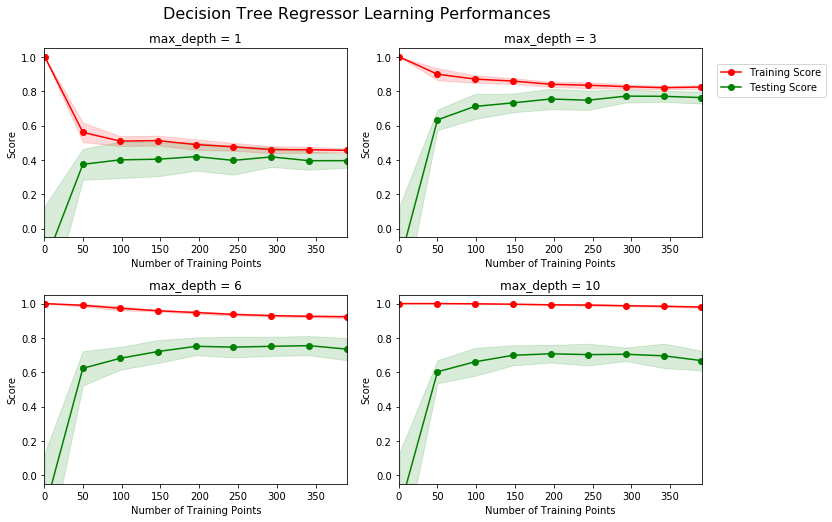

In [17]:
# Visualizing the learning curves with respect to training points
vs.ModelLearning(features, prices)

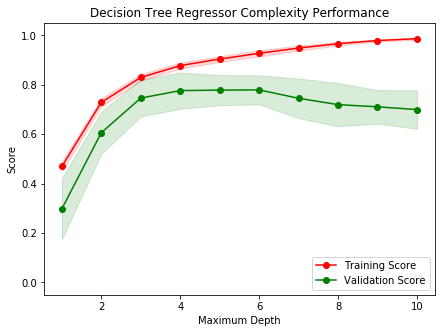

In [18]:
# Visualizing the learning curves with respect to depth
vs.ModelComplexity(X_train, y_train)

In [20]:
def fit_model(X, y):
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Using decision tree regressor model 
    regressor = DecisionTreeRegressor()

    # Creating a dictionary for the parameter 'max_depth' with a range from 1 to 10 for tracking
    params = {'max_depth':range(1,11)}

    # Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_func = make_scorer(performance_metric)

    # Grid Searching the data to compute the optimal model
    grid = GridSearchCV(regressor, params, scoring_func, cv=cv_sets)
    grid = grid.fit(X, y)

    return grid.best_estimator_

In [21]:
# Fitting the training data to the model using grid search
reg = fit_model(X_train, y_train)
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 6 for the optimal model.


In [22]:
# Producing a matrix for testing data
client_data = [[5, 17, 15],
               [4, 32, 22], 
               [8, 3, 12]]  


In [23]:
# Inference Stage
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $424,935.00
Predicted selling price for Client 2's home: $284,200.00
Predicted selling price for Client 3's home: $933,975.00


In [24]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
